# Aluno: Gabriel de Souza Scopel
# RA: 22.221.026-2


qtde comida 5 
Peso  8.96


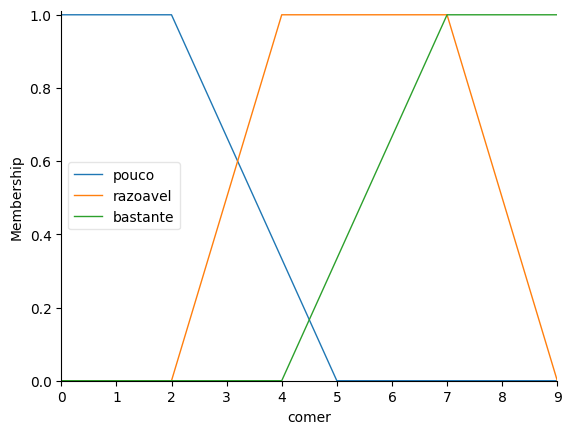

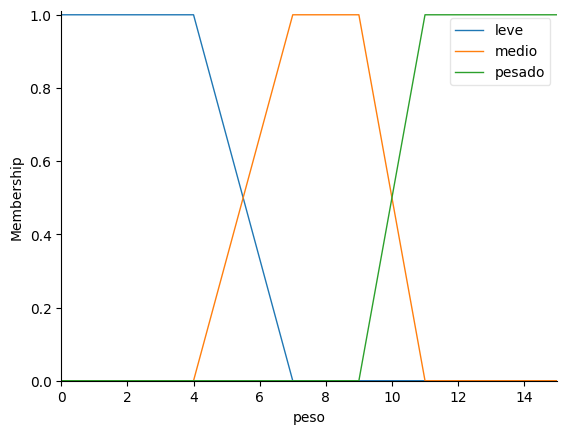

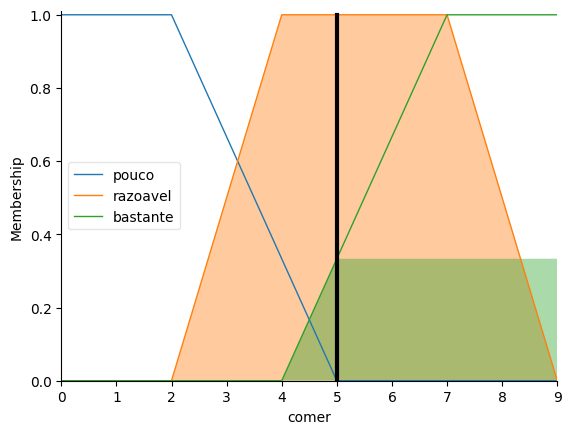

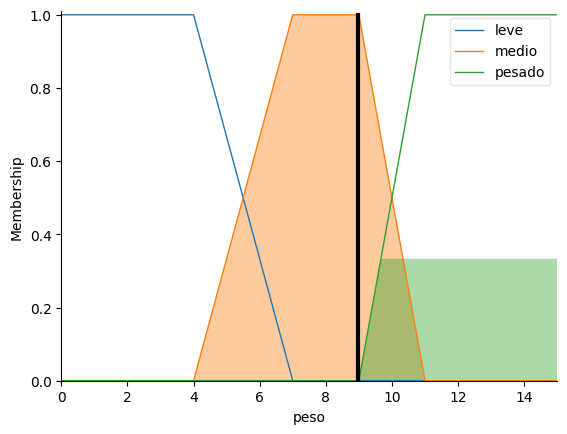

In [41]:
#pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 10, 1), 'comer')
#Variaveis de saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 16, 1), 'peso')

# automf -> Atribuição de categorias automaticamente
""" comer.automf(names=['pouco','razoavel','bastante'],)
peso.automf(names=['leve','medio','pesado']) """

# atribuicao sem o automf
comer['pouco'] = fuzz.trapmf(comer.universe,[0,0,2,5])
comer['razoavel'] = fuzz.trapmf(comer.universe, [2,4,7,9])
comer['bastante'] = fuzz.trapmf(comer.universe, [4,7,10,10])

peso['leve'] = fuzz.trapmf(peso.universe,[0,0,4,7])
peso['medio'] = fuzz.trapmf(peso.universe, [4,7,9,11])
peso['pesado'] = fuzz.trapmf(peso.universe, [9,11,16,16])

comer.view()
peso.view()


#Criando as regras
regra_1 = ctrl.Rule(comer['bastante'] , peso['pesado'])
regra_2 = ctrl.Rule(comer['razoavel'] , peso['medio'])
regra_3 = ctrl.Rule(comer['pouco'] , peso['leve'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])


#Simulando
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

qtdeComida = int(input('qtde kcal comida: '))
CalculoPeso.input['comer'] = qtdeComida
CalculoPeso.compute()

valorPeso = CalculoPeso.output['peso']

print("\nqtde comida %d \nPeso %5.2f" %(
        qtdeComida,
        valorPeso))


comer.view(sim=CalculoPeso)
peso.view(sim=CalculoPeso)

plt.show()


# testando para diferentes tipos de função de pertinência


qtde comida 5 
Peso  8.96


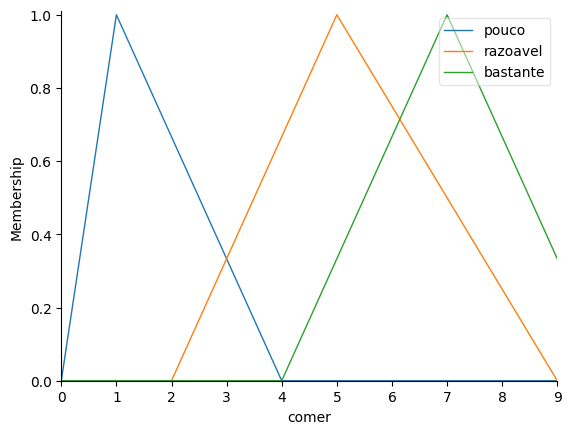

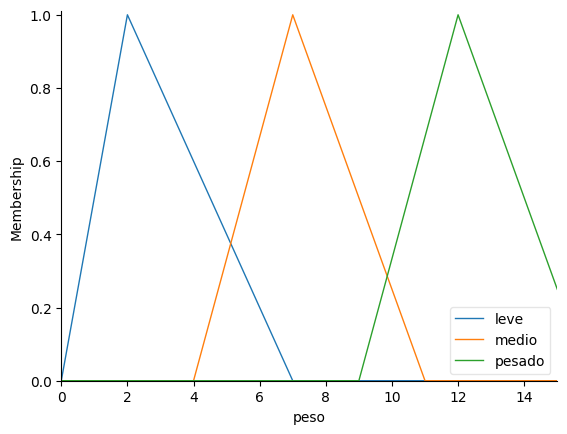

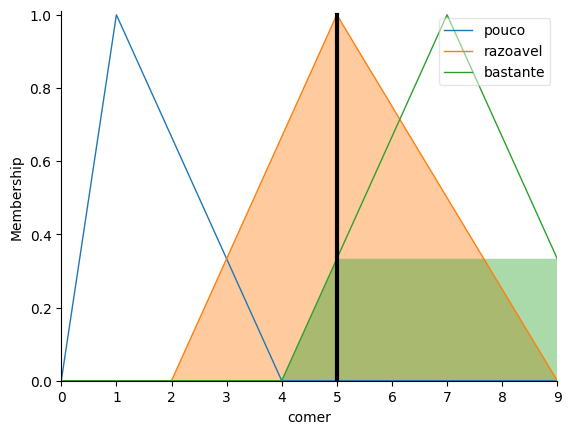

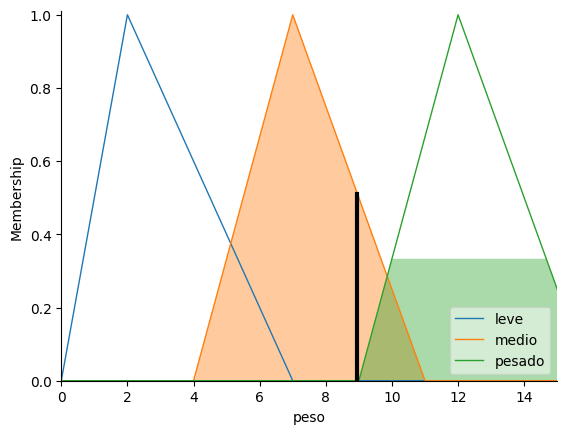

In [43]:
### TRIANGULAR
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variáveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 10, 1), 'comer')
# Variáveis de saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 16, 1), 'peso')

# Atribuição com funções de pertinência triangulares
comer['pouco'] = fuzz.trimf(comer.universe, [0, 1, 4])
comer['razoavel'] = fuzz.trimf(comer.universe, [2, 5, 9])
comer['bastante'] = fuzz.trimf(comer.universe, [4, 7, 10])

peso['leve'] = fuzz.trimf(peso.universe, [0, 2, 7])
peso['medio'] = fuzz.trimf(peso.universe, [4, 7, 11])
peso['pesado'] = fuzz.trimf(peso.universe, [9, 12, 16])

# Visualização das variáveis fuzzy
comer.view()
peso.view()

# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'], peso['pesado'])
regra_2 = ctrl.Rule(comer['razoavel'], peso['medio'])
regra_3 = ctrl.Rule(comer['pouco'], peso['leve'])

# Criando o sistema de controle
controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])

# Simulando
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

qtdeComida = int(input('qtde kcal comida: '))
CalculoPeso.input['comer'] = qtdeComida
CalculoPeso.compute()

valorPeso = CalculoPeso.output['peso']

print("\nqtde comida %d \nPeso %5.2f" % (
    qtdeComida,
    valorPeso))

# Visualizando a simulação
comer.view(sim=CalculoPeso)
peso.view(sim=CalculoPeso)

plt.show()



qtde comida 5 
Peso  9.24


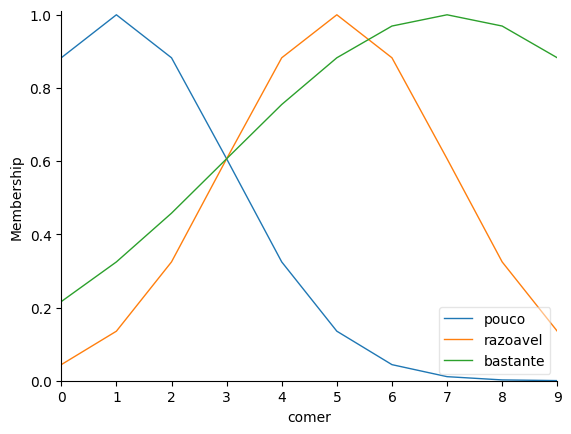

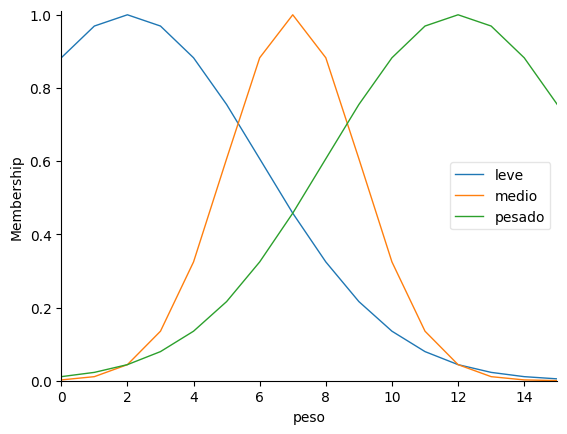

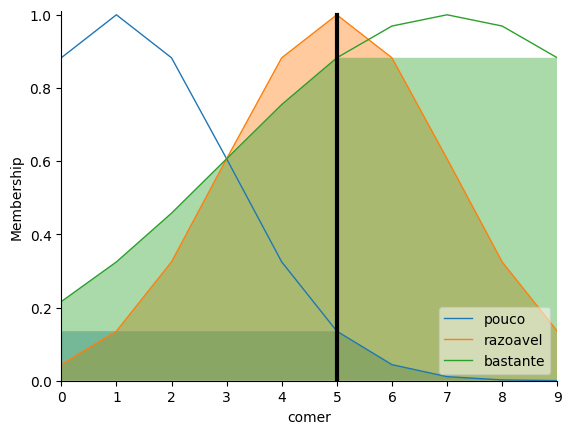

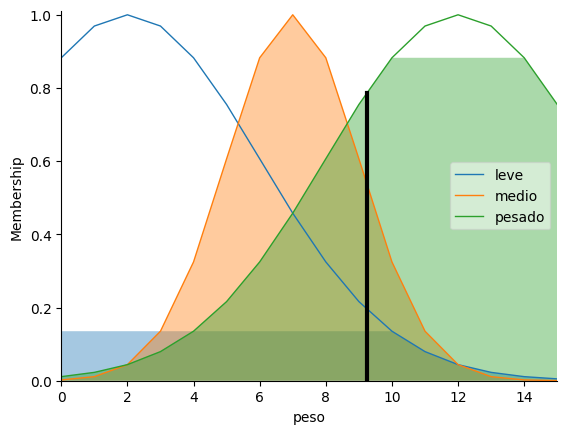

In [46]:
### GAUSSIANA

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variáveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 10, 1), 'comer')

# Variáveis de Saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 16, 1), 'peso')

# Definindo as funções de pertinência gaussianas (gaussmf)
comer['pouco'] = fuzz.gaussmf(comer.universe,  1, 2)
comer['razoavel'] = fuzz.gaussmf(comer.universe, 5, 2)
comer['bastante'] = fuzz.gaussmf(comer.universe, 7, 4)

peso['leve'] = fuzz.gaussmf(peso.universe,  2, 4)
peso['medio'] = fuzz.gaussmf(peso.universe, 7, 2)
peso['pesado'] = fuzz.gaussmf(peso.universe,  12, 4)
# Visualizando as variáveis
comer.view()
peso.view()

# Criando as regras (o operador mínimo é usado implicitamente)
regra_1 = ctrl.Rule(comer['bastante'], peso['pesado'])  # Se comer bastante, o peso é pesado
regra_2 = ctrl.Rule(comer['razoavel'], peso['medio'])   # Se comer razoavelmente, o peso é médio
regra_3 = ctrl.Rule(comer['pouco'], peso['leve'])       # Se comer pouco, o peso é leve

# Criando o sistema de controle fuzzy com as regras
controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])

# Criando a simulação do sistema de controle fuzzy
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

# Solicitando a entrada do usuário (quantidade de comida ingerida)
qtdeComida = int(input('qtde kcal comida: '))
CalculoPeso.input['comer'] = qtdeComida

# Computando o resultado com base nas regras fuzzy e operador mínimo
CalculoPeso.compute()

# Obtendo o valor da saída (peso resultante)
valorPeso = CalculoPeso.output['peso']

# Exibindo o resultado
print("\nqtde comida %d \nPeso %5.2f" % (qtdeComida, valorPeso))

# Visualizando as variáveis de entrada e saída com os resultados da simulação
comer.view(sim=CalculoPeso)
peso.view(sim=CalculoPeso)

plt.show()


# Analise de sensibilidade

- Comer (1000 kcal ingerida):
- 0 - 2: O grau de correlação é estável e a quantidade de comida é classificada como "pouco", correlação igual a 1
- 2 - 4: O grau de correlação como "pouco" começa a cair a medida que a quantidade calórica aumenta ( chegando a ser zero quando a quantidade calórica é 4000kcal) e a correlação com "razoável" começa a aumentar a partir de 3000 kcal
- 4 - 6: O grau de correção com "razoável" se mantem estável (e igual a 1) e a partir de 5000 kcal o grau de correlação com "bastante" começa a aumentar e se torna igual a 1 com 7000 kcal
- 6 - 8: O grau de correlação com "razoável" começa a cair (sendo igual a zero quando kcal é igual a 9000) enquanto a relação com "bastante" é crescente
- 8 em diante: o grau de correlação com "bastante" é estável e igual a 1

- Peso (10 kg)
- 0 - 4: O grau de correlação é igual a 1 para peso leve
- 4 - 6: O grau de correlação com peso leve começa a cair sendo zerado em 60kg enquanto o grau de correlação com peso médio começa a aumentar sendo igual a 1 em 60kg
- 6 - 8: O grau de correlação com peso médio se mantem igual 1 
- 8 - 10: O grau de correlação com peso médio começa a cair sendo zerado em 100kg enquanto o grau de correlação com peso pesado começa a aumentar e se torna igual a 1 em 100kg
- 10 em diante: o grau de correlação com peso pesado é igual a 1

# Criando nova variável de entrada (atividade fisica) e novas regras


Quantidade de comida: 5 
Peso:  7.70


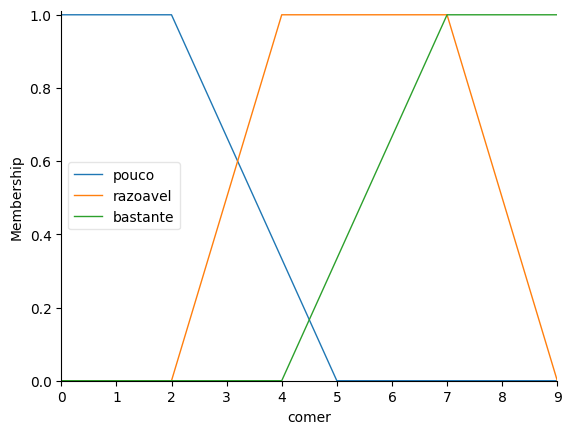

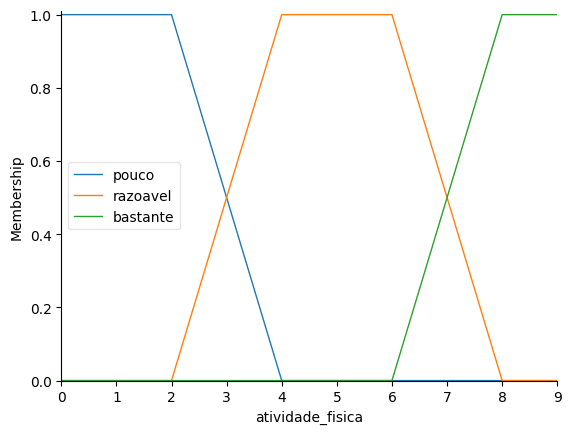

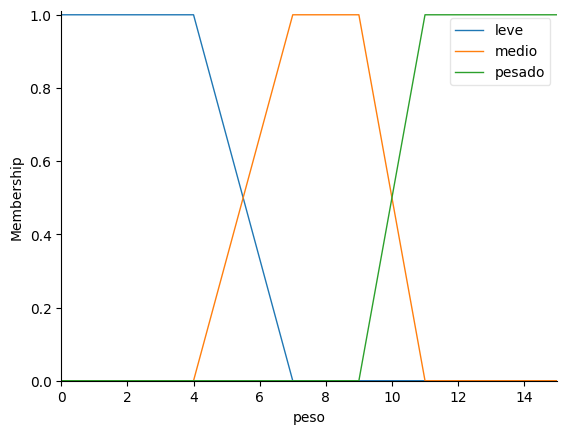

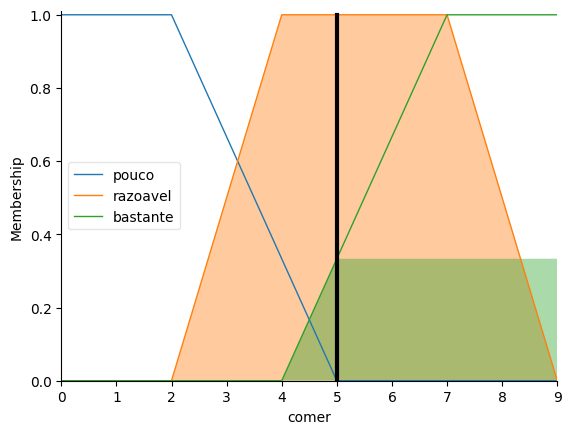

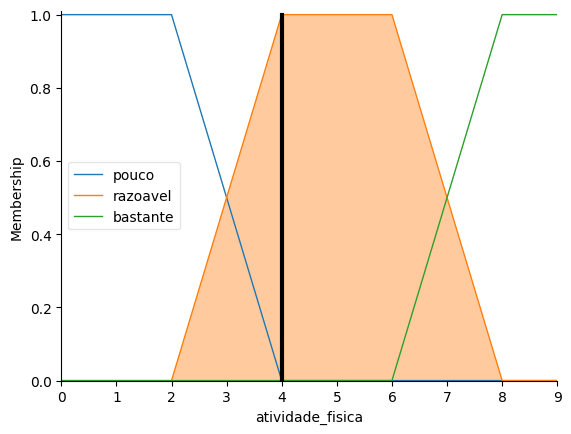

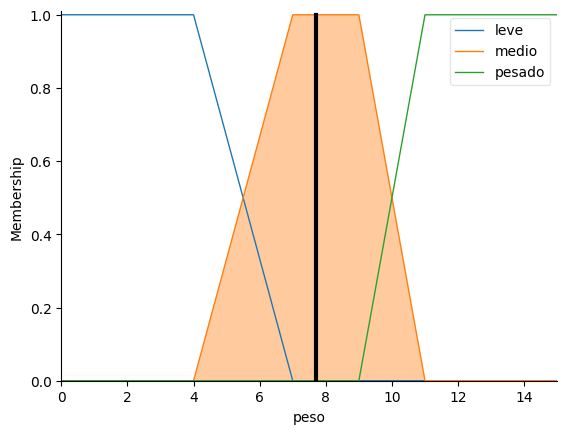

In [47]:
# Importando as bibliotecas necessárias
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variáveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 10, 1), 'comer')
atividade_fisica = ctrl.Antecedent(np.arange(0, 10, 1), 'atividade_fisica')

# Variáveis de Saída (Consequent)
peso = ctrl.Consequent(np.arange(0, 16, 1), 'peso')

# Atribuição de categorias sem o automf
comer['pouco'] = fuzz.trapmf(comer.universe, [0, 0, 2, 5])
comer['razoavel'] = fuzz.trapmf(comer.universe, [2, 4, 7, 9])
comer['bastante'] = fuzz.trapmf(comer.universe, [4, 7, 10, 10])

atividade_fisica['pouco'] = fuzz.trapmf(atividade_fisica.universe, [0, 0, 2, 4])
atividade_fisica['razoavel'] = fuzz.trapmf(atividade_fisica.universe, [2, 4, 6, 8])
atividade_fisica['bastante'] = fuzz.trapmf(atividade_fisica.universe, [6, 8, 10, 10])

peso['leve'] = fuzz.trapmf(peso.universe, [0, 0, 4, 7])
peso['medio'] = fuzz.trapmf(peso.universe, [4, 7, 9, 11])
peso['pesado'] = fuzz.trapmf(peso.universe, [9, 11, 16, 16])

# Visualizando as variáveis
comer.view()
atividade_fisica.view()
peso.view()

# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'] & atividade_fisica['bastante'], peso['leve'])
regra_2 = ctrl.Rule(comer['razoavel'] & atividade_fisica['razoavel'], peso['medio'])
regra_3 = ctrl.Rule(comer['pouco'] & atividade_fisica['pouco'], peso['pesado'])
regra_4 = ctrl.Rule(comer['pouco'] & atividade_fisica['bastante'], peso['medio'])
regra_5 = ctrl.Rule(comer['bastante'] & atividade_fisica['pouco'], peso['pesado'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5])

# Simulando
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

# Entrada do usuário
qtdeComida = int(input('Quantidade de kcal comida: '))
tempoAtividade = int(input('Tempo de atividade física (0-10): '))

CalculoPeso.input['comer'] = qtdeComida
CalculoPeso.input['atividade_fisica'] = tempoAtividade
CalculoPeso.compute()

valorPeso = CalculoPeso.output['peso']

print("\nQuantidade de comida: %d \nPeso: %5.2f" % (
        qtdeComida,
        valorPeso))

# Visualizando as variáveis com a simulação
comer.view(sim=CalculoPeso)
atividade_fisica.view(sim=CalculoPeso)
peso.view(sim=CalculoPeso)

plt.show()


# Comparando os diferentes modelos

O código antigo, que considerava apenas a variável de entrada "comer", resultava em saídas limitadas baseadas em três regras simples: uma quantidade de comida "bastante" levava a um peso "pesado", enquanto "razoavel" e "pouco" resultavam em peso "medio" e "leve", respectivamente. O novo código introduz uma segunda variável de entrada, "atividade_fisica", permitindo um sistema mais dinâmico com cinco regras. Agora, a saída de peso depende da interação entre a quantidade de comida e o tempo de atividade física, proporcionando resultados mais variados. Essa mudança torna o modelo capaz de refletir melhor as condições reais do usuário.

# Minha experiência e outro exemplo

Minha experiência resolvendo esse problema foi enriquecedora, pois a lógica fuzzy permite modelar situações complexas que não podem ser facilmente tratadas por métodos tradicionais. Outro exemplo interessante de aplicação da lógica fuzzy é no controle de temperatura em sistemas de climatização